 # Modeling Results

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

import pickle

from sklearn.pipeline import make_pipeline

sns.set()

## 1. Relevant Functions

In [5]:
def plot_impfeatures(models, model_label, ncol=None):
    if ncol is None:
        ncol = 2
    nrow = int(np.ceil(len(models) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=(15, 8*nrow), squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, model in enumerate(models):
        ax = axes.flatten()[i]
        print(model)
        importances = model.feature_importances_
        indices = np.argsort(importances)
        features = X_train.columns
        
        ax.barh(range(len(indices)), importances[indices], color='b', align='center')
        ax.set(title=model_label[i])
        ax.set(xlabel='Relative Importance')
        ax.set_yticks(range(len(indices)), [features[i] for i in indices])
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [8]:
def shap_values(model):
    explainer = shap.Explainer(model.predict,X_train[0:100])
    shap_values = explainer(X_test)
    return shap_values

In [9]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn import metrics

## 2. Load Data

In [10]:
final_df = pd.read_csv('../clean_data/final_df.csv')
final_df.head()

,step,amount,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,281,109339.40,0,0,1,0,0,0
1,381,32426.51,0,1,0,0,0,0
2,20,55810.86,0,1,0,0,0,0
3,331,50514.72,0,0,1,0,0,0
4,182,16539.44,0,0,0,0,1,0


In [11]:
y = final_df['isFraud']
X = final_df.drop(columns = 'isFraud')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

 ## 3 Load different Models

In [60]:
model_names =['RandomForest', 'XGBoost']

In [61]:
rf  = pickle.load(open('../models/'+ model_names[0]+'.pkl', 'rb'))
xg = pickle.load(open('../models/'+ model_names[1]+'.pkl', 'rb'))

In [62]:
models =[rf,xg]

 ### 3.1 Plot Important Features

RandomForestRegressor(n_estimators=1000)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


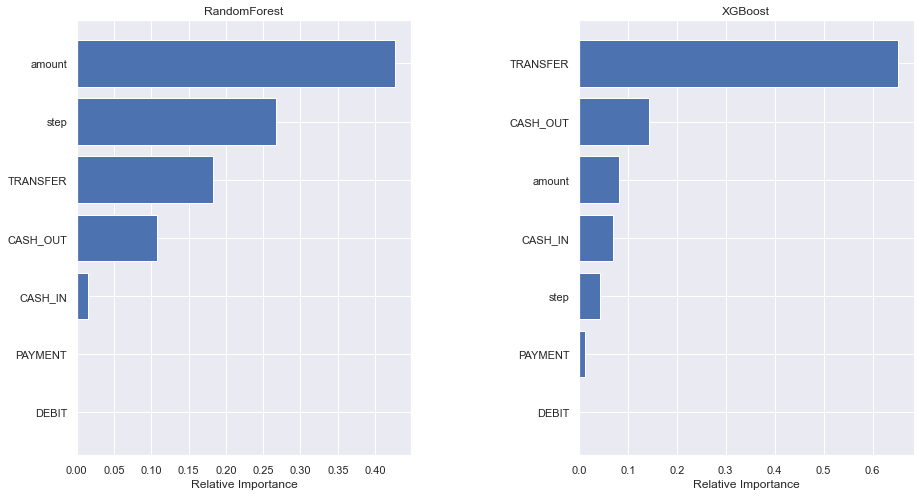

In [63]:
plot_impfeatures(models, model_names)

### 3.2 SHAP Analysis

In [55]:
xg_shap_values = shap_values(xg)

Exact explainer: 5422it [00:43, 103.38it/s]                                                                                                 


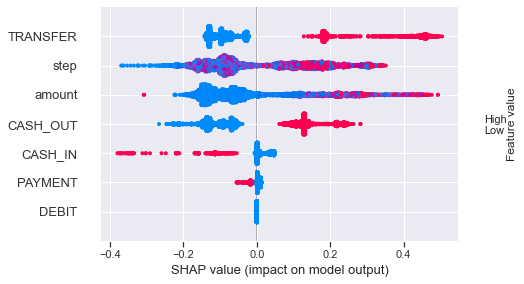

In [56]:
shap.plots.beeswarm(xg_shap_values)

In [65]:
rf_shap_values = shap_values(rf)

Exact explainer: 5422it [28:15,  3.18it/s]                                                                                                  


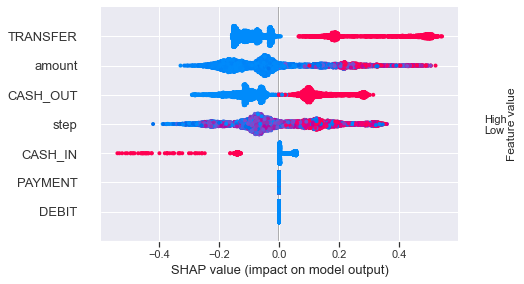

In [66]:
shap.plots.beeswarm(rf_shap_values)